#### Capstone Project 2 - Final Submission

# WHO WILL PAY THEIR LOAN

*It is important to know beforehand who is able to pay their loans and who is not*

# 1. Getting started

In [1]:
# Import the necessaries libraries for the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the files
train = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/snd capstone project/puzzle_train_dataset.csv", header=0)
test = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/snd capstone project/puzzle_test_dataset.csv", header=0)

# 2. Data Wrangling and Cleaning

In [3]:
# Inspecting the variables (columns) in the train set
print("Number of columns:",len(train.columns))
train.columns

Number of columns: 29


Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues'],
      dtype='object')

In [4]:
# Inspecting the variables (columns) in the test set
print("Number of columns:",len(test.columns))
test.columns

Number of columns: 28


Index(['ids', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit',
       'reason', 'income', 'sign', 'gender', 'facebook_profile',
       'last_payment', 'end_last_loan', 'state', 'zip', 'channel', 'job_name',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues'],
      dtype='object')

 As we can see the dataset is divided in train and test sets. And both have the same variables except for the target variable "default" in the test set.
**For the data cleaning and wrangling we will append both sets** and later split again to perform the machine learing prediction.

In [5]:
# Adding the default variable in the test and adjusting the order
test['default'] = np.nan
cols = ['ids',
 'default',
 'score_1',
 'score_2',
 'score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'reason',
 'income',
 'sign',
 'gender',
 'facebook_profile',
 'last_payment',
 'end_last_loan',
 'state',
 'zip',
 'channel',
 'job_name',
 'real_state',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues']
test = test[cols]
test.columns

Index(['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months',
       'credit_limit', 'reason', 'income', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues'],
      dtype='object')

In [6]:
# Appending train and test
data = train.append(test, ignore_index=True)
print(len(train), "+", len(test), "=", len(data))

64592 + 35000 = 99592


In [7]:
# Checking the appending performed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99592 entries, 0 to 99591
Data columns (total 29 columns):
ids                   99592 non-null object
default               59966 non-null object
score_1               98399 non-null object
score_2               98399 non-null object
score_3               98399 non-null float64
score_4               99592 non-null float64
score_5               99592 non-null float64
score_6               99592 non-null float64
risk_rate             98399 non-null float64
amount_borrowed       98399 non-null float64
borrowed_in_months    98399 non-null float64
credit_limit          69163 non-null float64
reason                98390 non-null object
income                98399 non-null float64
sign                  67391 non-null object
gender                88593 non-null object
facebook_profile      89610 non-null object
last_payment          98285 non-null object
end_last_loan         98395 non-null object
state                 98399 non-null object
zi

We can see there are **14 numerical variables and 15 object variables.**

## 2.1 Checking the most important variables: Ids and Target:

In [8]:
# Checking if every Id is unique
len(pd.unique(data.ids))

99592

In [9]:
# Checking the target variable (default)
data['default'].value_counts()

False    50456
True      9510
Name: default, dtype: int64

In [10]:
# Calculating the proportion of true default in relation to the total observations
print(np.trunc(len(train[train.default == True])/(50456 + 9510)*100), "%")

15.0 %


In [11]:
# Calculating the amount of missing values
len(train[pd.isnull(train['default'])])

4626

****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway One:**

As we can see the **target variable has 4.626 missing values**. Unfortunately  the only alternative is to drop the observations from the train set that don't have a target value. But before we do that, we will use the values from this observations on the other variables. And after the dataset is wrangled we will drop this.</font>
</div>
****

## 2.2 Checking the other variables:

1. Check rows with missing values
2. Check features with high correlation and inconsistent values
3. Check features with missing value
4. Check features types
5. Check features with high cardinality

In [12]:
# Basic statistical overview of the numerical variables
data.describe()

score_3       score_4       score_5       score_6     risk_rate  \
count  98399.000000  99592.000000  99592.000000  99592.000000  98399.000000   
mean     348.197848     99.994746      0.499113     99.989787      0.296498   
std      109.956962      3.166998      0.288602     10.051112      0.101815   
min        0.000000     86.191572      0.000015     59.250937      0.000000   
25%      270.000000     97.860058      0.250371     93.215781      0.220000   
50%      340.000000     99.994765      0.498103    100.004862      0.290000   
75%      420.000000    102.122979      0.749132    106.742009      0.360000   
max      990.000000    113.978234      0.999995    142.430069      0.930000   

       amount_borrowed  borrowed_in_months   credit_limit        income  \
count     98399.000000        98399.000000   69163.000000  9.839900e+04   
mean      13815.349083           41.832986   34306.738791  7.153651e+04   
std        8086.589285           10.294125   36765.823549  5.086523e+04   
min         527.070000           36.000000       0.000000  4.814090e+03   
25%        7699.110000           36.000000   10000.000000  4.501190e+04   
50%       12022.540000           36.000000   25697.000000  6.102565e+04   
75%       19219.800000           36.000000   46898.500000  8.601424e+04   
max       35059.910000           60.000000  902504.000000  5.000028e+06   

           ok_since  n_bankruptcies  n_defaulted_loans    n_accounts  \
count  40921.000000    98092.000000       98375.000000  98399.000000   
mean      35.085360        0.077590           0.004503     10.680728   
std       21.612396        0.277699           0.076719      4.592372   
min        0.000000        0.000000           0.000000      0.000000   
25%       17.000000        0.000000           0.000000      7.000000   
50%       32.000000        0.000000           0.000000     10.000000   
75%       50.000000        0.000000           0.000000     13.000000   
max      148.000000        6.000000           5.000000     53.000000   

           n_issues  
count  74295.000000  
mean      11.048779  
std        4.590950  
min        0.000000  
25%        8.000000  
50%       10.000000  
75%       14.000000  
max       53.000000

In [13]:
# For a more detailed report, we will use pandas profiling
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().star

### 2.2.1 Check rows with missing values

We will first chech if there are observations(rows) with over 50% of the features missing

In [14]:
miss = data.isnull().sum(axis=1)
miss.value_counts().sort_index()

0     10012
1     25787
2     26414
3     20647
4     11457
5      3544
6       508
7        29
8         1
22       68
23      647
24      440
25       38
dtype: int64

In [15]:
miss = miss.reset_index()
miss = miss.rename(columns = { 0 : 'sum_features'})

In [16]:
miss = miss[miss.sum_features > 21]
miss.index

Int64Index([   74,   114,   132,   305,   429,   537,   559,   570,   616,
              754,
            ...
            98624, 98864, 99022, 99085, 99094, 99132, 99147, 99246, 99421,
            99518],
           dtype='int64', length=1193)

In [17]:
data = data.drop(miss.index)
len(data)

98399

This was quite helpfull because by dropping those 1193 observations there are 6 less features(columns) with missing values. GREAT!

****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Two:**

This was quite helpful because by dropping those 1193 observations there are 6 less features(columns) with missing values. GREAT!</font>
</div>
****

### 2.2.2 Check features with high correlation and inconsistent values

Features with high correlation can interfere on the prediction model in a negative way, so we should chech and drop. Another important check is the accuracy of the values in the features.

In [18]:
pandas_profiling.ProfileReport(data)

In [19]:
data = data.drop(['channel', 'n_issues'], axis=1)

****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Three:**

The variable n_isses hada a high correlation with n_accounts, so we have droped it.
The variable channel had only a single unique value and missing data, so we also dropped it. Not Bad!</font>
</div>
****

### 2.2.3 Check features with missing value

****
<div class="span5 alert alert-info">
<font color=black>
**How we will handle missing values**

Taking into consideration the influence in the algorithim and that deletion should be the last alternatively.
> The choice of method to impute missing values, largely influences the model’s predictive ability. In most statistical analysis
> methods, listwise deletion is the default method used to impute missing values. But, it not as good since it leads to
> information loss.[https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/]

Looking for the adequate technique from multiple alternatives, we will induviadually asses the variables and decide between single imputation or multiple imputation. The reason not to just do single imputation, as it would be the easist is this drawbacks.
>Mean imputation reduces the variance of the imputed variables.
>Mean imputation shrinks standard errors, which invalidates most hypothesis tests and the calculation of confidence interval.
>Mean imputation does not preserve relationships between variables such as correlations.on this case will use a more standart >method of using the median of variable.[https://blogs.sas.com/content/iml/2017/12/06/problems-mean-imputation.html]

For the multiple imputation we will use MICE package in R following this tutorial: [https://www.r-bloggers.com/imputing-missing-data-with-r-mice-package/].**</font>
</div>
****

In [20]:
pandas_profiling.ProfileReport(data)

### 2.2.3.1 Way too much missing values: Ok_since:

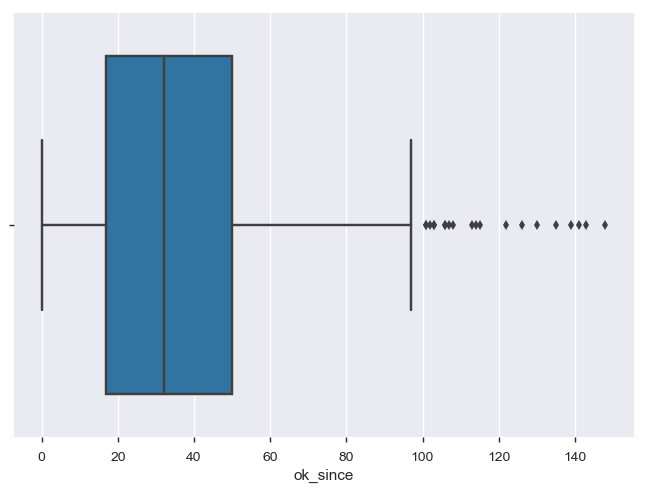

In [21]:
# Boxplot of Ok_since
sns.boxplot('ok_since', data=data)

(array([  8.45600000e+03,   1.02980000e+04,   9.06300000e+03,
          6.11300000e+03,   4.52600000e+03,   2.43500000e+03,
          1.50000000e+01,   7.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([   0. ,   14.8,   29.6,   44.4,   59.2,   74. ,   88.8,  103.6,
         118.4,  133.2,  148. ]),
 <a list of 10 Patch objects>)

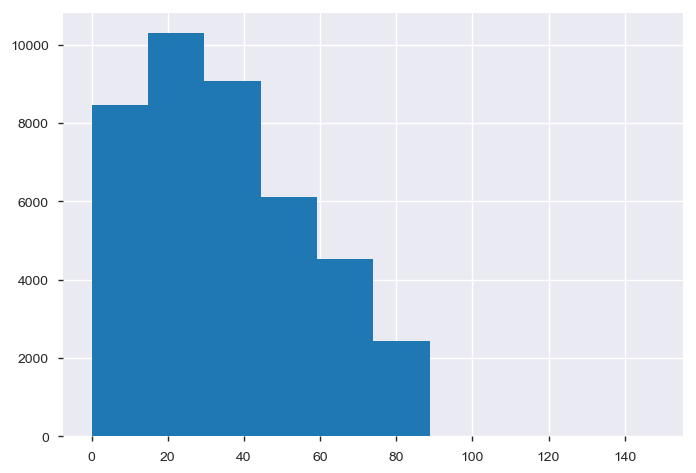

In [22]:
# Histogram of Ok_since
plt.hist(data.ok_since.dropna())

In [23]:
data = data.drop(['ok_since'], axis=1)

****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Four:**

The Ok_since variable has a skewed distribution, no outliers and 57.478 / 58.4% of missing data. Due to the high proportion of missing we won´t use in the model.</font>
</div>
****

### 2.2.3.1 Multiple Imputation: facebook_profile, credit_limit, n_bankruptcies, n_defaulted_loans

In [24]:
data.to_csv("data_capstone2.csv")

****
<div class="alert alert-block alert-warning">
<font color=black>
**used rstudio**

</font>
</div>
****

In [25]:
mice_output = pd.read_csv("D:/DADOS USUARIO/Documents/complete_imputed.csv")

Text(0.5,1,'Credit limit log: Mice Output')

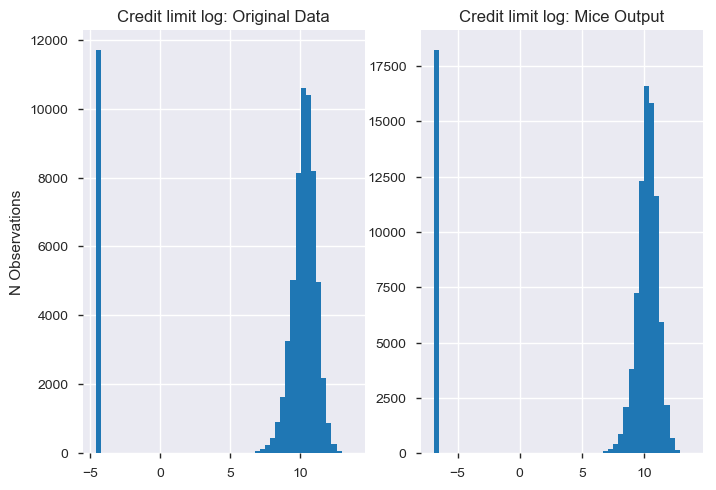

In [26]:
# Checking distribuitions

# Histogram for Credit limit, but taking the logarithm
a = data.credit_limit
a = a.dropna()
a = a.replace(0, 0.01) # we had to replace the zeros to small values to take the log
a = np.log(a)
plt.subplot(1, 2, 1)
plt.hist(a, bins = 50)
plt.title('Credit limit log: Original Data')
plt.ylabel('N Observations')

plt.subplot(1, 2, 2)
plt.hist(mice_output.credit_limit_log, bins = 50)
plt.title('Credit limit log: Mice Output')


**Isn´t that beatifull? ;-)**

Text(0.5,1,'N_defaulted_loans: Mice Output')

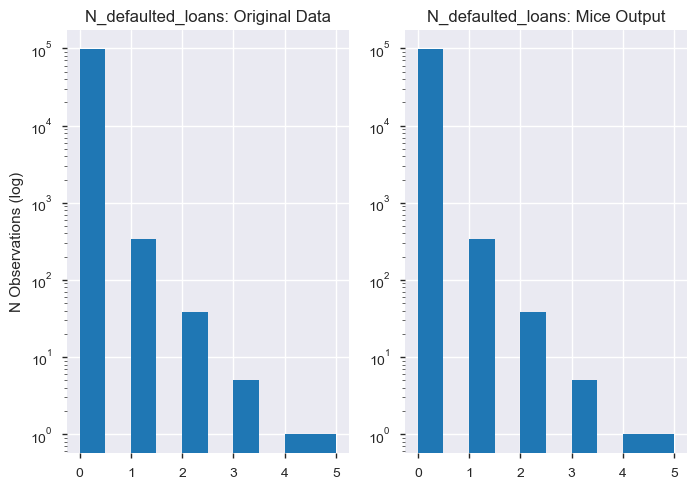

In [27]:
# Checking distribuitions

# Histogram on N_defaulted_loans
plt.subplot(1, 2, 1)
plt.hist(data.n_defaulted_loans.dropna(), log="x")
plt.title('N_defaulted_loans: Original Data')
plt.ylabel('N Observations (log)')

plt.subplot(1, 2, 2)
plt.hist(mice_output.n_defaulted_loans, log="x")
plt.title('N_defaulted_loans: Mice Output')


Text(0.5,1,'Gender: Mice Output')

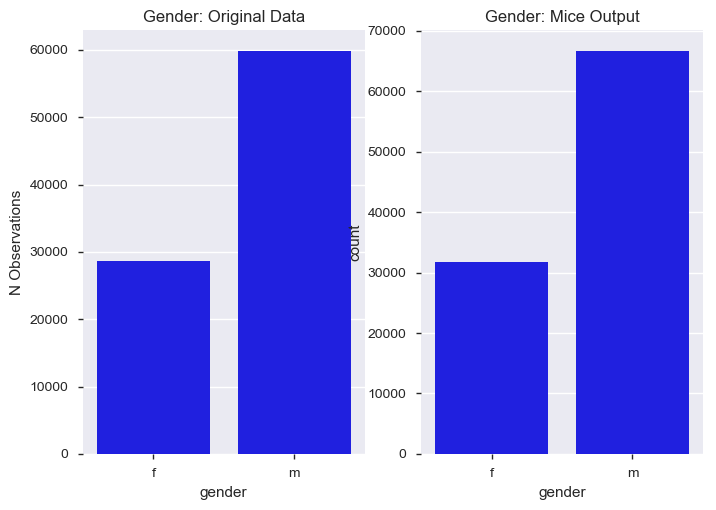

In [28]:
# Checking Countplot

# Histogram on N_defaulted_loans
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data= data, color='b')
plt.title('Gender: Original Data')
plt.ylabel('N Observations')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', data= mice_output, color='b')
plt.title('Gender: Mice Output')


Text(0.5,1,'Facebook_profile: Mice Output')

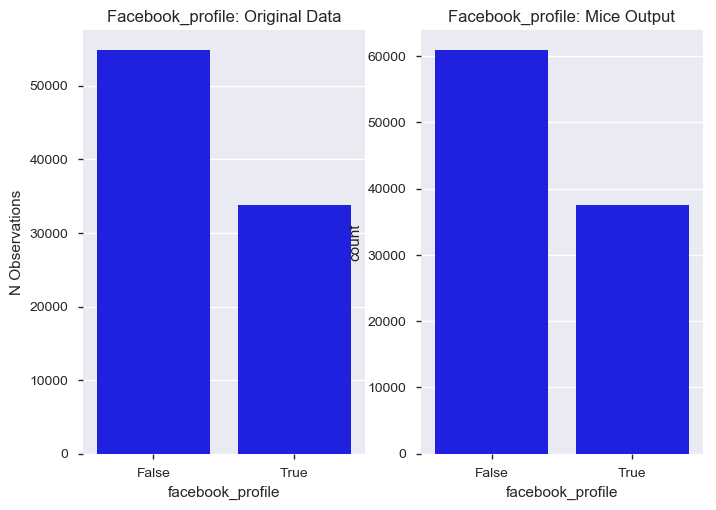

In [29]:
# Checking Countplot

# Histogram on N_defaulted_loans
plt.subplot(1, 2, 1)
sns.countplot(x='facebook_profile', data= data, color='b')
plt.title('Facebook_profile: Original Data')
plt.ylabel('N Observations')

plt.subplot(1, 2, 2)
sns.countplot(x='facebook_profile', data= mice_output, color='b')
plt.title('Facebook_profile: Mice Output')


Text(0.5,1,'N_bankruptcies: Mice Output')

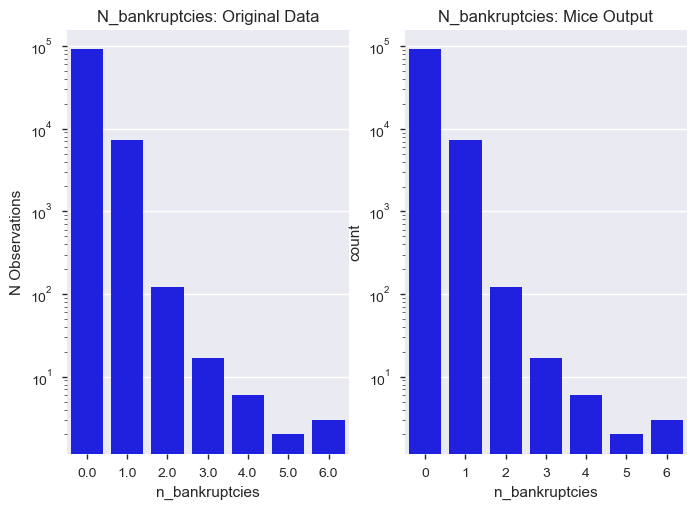

In [30]:
# Checking Countplot

# Histogram on N_defaulted_loans
plt.subplot(1, 2, 1)
sns.countplot(x='n_bankruptcies', data= data, color='b', log="x")
plt.title('N_bankruptcies: Original Data')
plt.ylabel('N Observations')

plt.subplot(1, 2, 2)
sns.countplot(x='n_bankruptcies', data= mice_output, color='b', log="x")
plt.title('N_bankruptcies: Mice Output')


Text(0.5,1,'Sign: Mice Output')

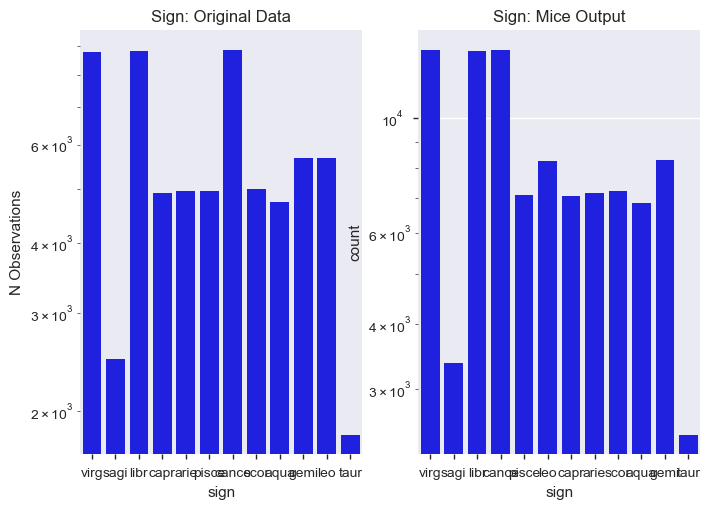

In [31]:
# Checking Countplot

# Histogram on N_defaulted_loans
plt.subplot(1, 2, 1)
sns.countplot(x='sign', data= data, color='b', log="x")
plt.title('Sign: Original Data')
plt.ylabel('N Observations')

plt.subplot(1, 2, 2)
sns.countplot(x='sign', data= mice_output, color='b', log="x")
plt.title('Sign: Mice Output')


****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Five:**

The distributions were not changed so we will replace the Nas for the multiple imputation.</font>
</div>
****

In [32]:
data['credit_limit'] = mice_output['credit_limit_log'].values
data['n_defaulted_loans'] = mice_output['n_defaulted_loans'].values
data['facebook_profile'] = mice_output['facebook_profile'].values
data['n_bankruptcies'] = mice_output['n_bankruptcies'].values
data['gender'] = mice_output['gender'].values
data['sign'] = mice_output['sign'].values

### 2.2.4 Check features types

In [33]:
print(data.last_payment.head())
print(data.end_last_loan.head())

0    2014-10-01
1    2014-03-01
2    2016-09-01
3    2015-01-01
4    2016-10-01
Name: last_payment, dtype: object
0    2015-11-01
1    2014-03-01
2    2017-03-01
3    2015-01-01
4    2017-03-01
Name: end_last_loan, dtype: object


****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Six:**

There are two variables with dates so we adjusted the type.</font>
</div>
****

In [34]:
data.last_payment = pd.to_datetime(data.last_payment, format='%Y/%m/%d')
data.end_last_loan = pd.to_datetime(data.end_last_loan, format='%Y/%m/%d')

### 2.2.5 Check features with high cardinality

In [35]:
pandas_profiling.ProfileReport(data)

In [36]:
data = data.drop(['reason'], axis=1)
data = data.drop(['job_name'], axis=1)
data = data.drop(['zip'], axis=1)

****
<div class="alert alert-block alert-success">
<font color=black>
**Takeaway Seven:**

HIgh cardinality is a problem for machine learning algorithms as they influence negatively the performance. A common alternative to get by this is by grouping the levels, but in this data set this variables had hidden values not letting interpret. So the decision was to drop the variables: reason with 29482, job_name with 65673, zip with 840 distinct values.</font>
</div>
****

In [37]:
pandas_profiling.ProfileReport(data)

# 3. Explotatory Data Analysis

In [38]:
train = data.iloc[0:63807,:]
test = data.iloc[63807:len(data),:]
train = train[train.default.notnull()]

In [43]:
t = train
t = t.drop(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6','ids'], axis=1)
t = t.dropna()
t_last_payment = t.set_index("last_payment")
t_end_last_loan = t.set_index("end_last_loan")
t_last_payment["month"] = t_last_payment.index.month
t_last_payment["year"] = t_last_payment.index.year
t_end_last_loan["year"] = t_end_last_loan.index.year
t_end_last_loan["month"] = t_end_last_loan.index.month

C:\Users\Usuario\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,0,"End of last loan's Month")

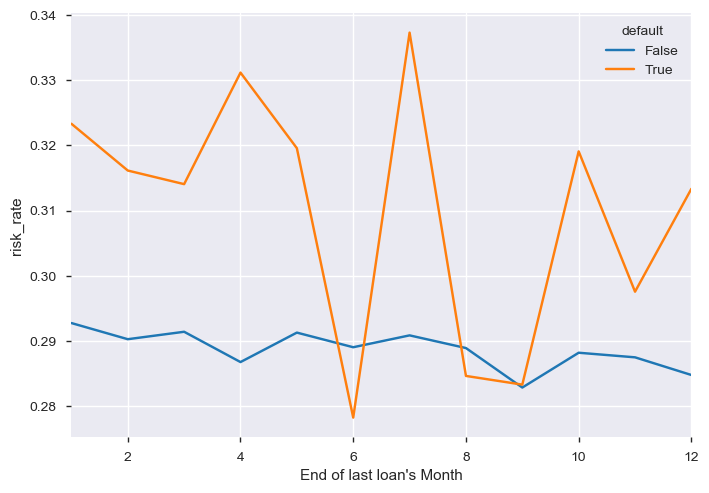

In [53]:
a = t_end_last_loan.groupby(['default','month'])['risk_rate'].mean()
a = a.reset_index()
a['subject'] = 0
# Plot the response with standard error
sns.tsplot(data=a, time="month", condition="default", value="risk_rate", unit="subject")
plt.xlabel("End of last loan's Month")

****
<div class="alert alert-block alert-success">
<font color=black>
**INSIGHT ONE:**

IS THERE A SEASONALITY FOR  DEFAULT?
The chart below shows how risk rate changes according each month. The blue line for the good payers is flat against an orange line of default with peaks and valleys. People who have their loan ended on April, july and october have a higher probability of default.</font>
</div>
****

(-5000, 41000)

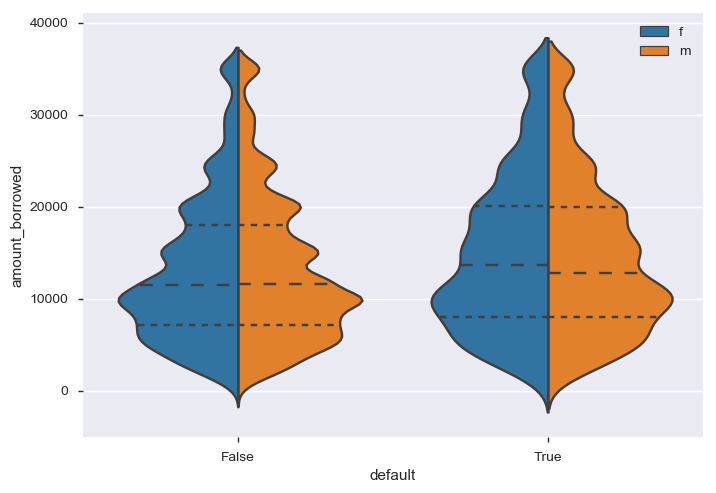

In [40]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="default", y="amount_borrowed", hue="gender", data=train, split=True, inner="quart")
plt.legend(loc='upper right')
plt.ylim((-5000, 41000))

****
<div class="alert alert-block alert-success">
<font color=black>
**INSIGHT TWO:**

DOES MEN AND WOMEN BEHAVE THE SAME WAY ON DEFAULT AND AMOUNT BORROWED?
Equality is a big flag being displayed nowadays, but in financial operations gender is an important variable to be considered. The chart below shows a less skewed distribution for  defaulted payments regarding the amount borrowed. And slightly higher mean on the amount borrowed by women.</font>
</div>
****

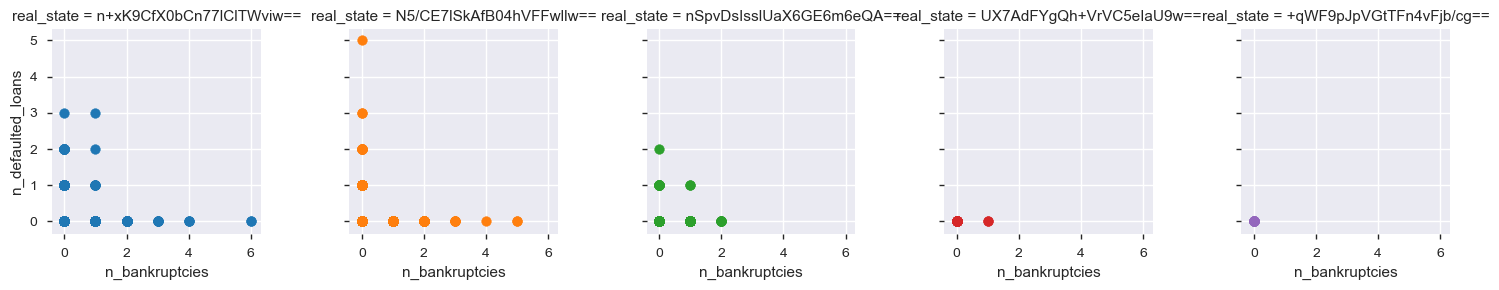

In [41]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(train, col="real_state", hue="real_state", col_wrap=5)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.scatter, "n_bankruptcies", "n_defaulted_loans")

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

****
<div class="alert alert-block alert-success">
<font color=black>
**INSIGHT THREE:**

CAN IT BE REVEALED THE TYPES OF REAL STATE?
This data has provided data on real state but the meaning was hidden jeopardizing the interpretability. But by plotting against defaulted loans and bankruptcies it was evident the differences between the 5 levels.</font>
</div>
****

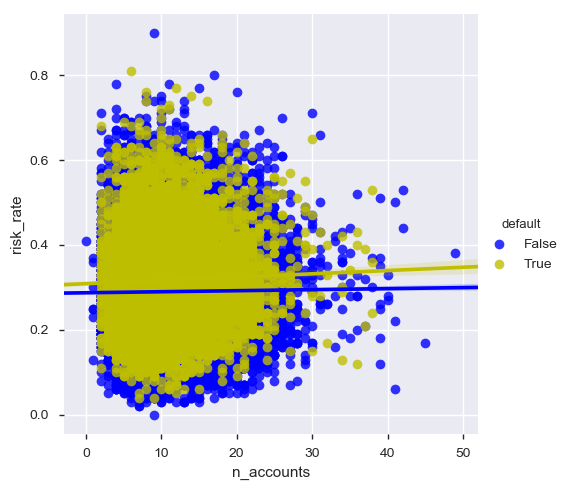

In [42]:
sns.lmplot(x="n_accounts", y="risk_rate", hue='default', data=train, palette={False: "b", True: "y"})

****
<div class="alert alert-block alert-success">
<font color=black>
**INSIGHT FOUR:**

DOES THE NUMBER OF ACCOUNTS AND RISK RATE INCREASES THE CHANCE OF DEFAULT?
The chart below shows risk rate on the vertical axis and it is possible to see the defaulted green data points are less spread than the blue. And looking at the horizontal axis that corresponds to the number of accounts the same pattern was found. What drove more to conclusions was the regression lines plotted because they are distant from each other and a little twisted up. Showing that both variables influence default, but risk rate has a bigger impact.</font>
</div>
****

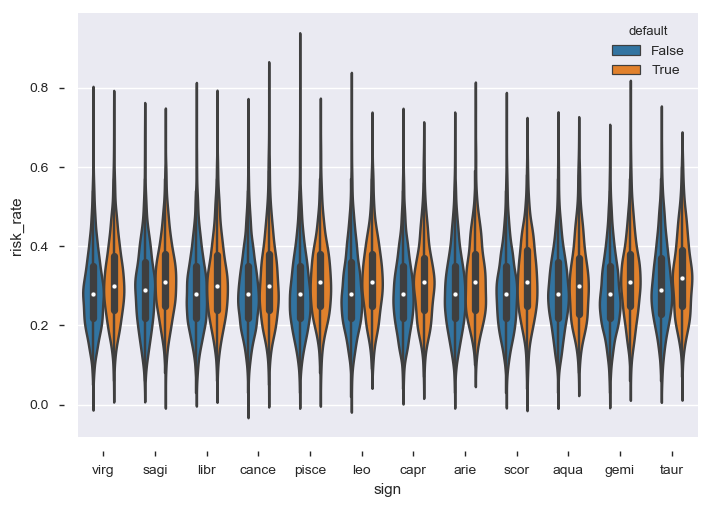

In [39]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="sign", y="risk_rate", hue="default", data=train)
sns.despine(offset=10, trim=True)

****
<div class="alert alert-block alert-success">
<font color=black>
**INSIGHT FIVE:**

DOES A PERSON SIGN CAN POINTS TO RISK RATE AND DEFAULT?
In the financial community is hard to find people that would take seriously using the sign of a person to prediction. As a data scientist we should let always data tell what should be considered or not. The chart below gives a first impression that the relation of risk and sign is random, but taking from astrology that pisces is know as a risk taker and capricorn as a grounded money focused we can see that there is a slightly difference on the size of those plots.</font>
</div>
****

# 4. Feature engineering

## 4.1 Decompose Categorical Attributes

In [59]:
print(len(data.sign.value_counts()))
print(len(data.gender.value_counts()))
print(len(data.facebook_profile.value_counts()))
print(len(data.state.value_counts()))
print(len(data.score_1.value_counts()))
print(len(data.score_2.value_counts()))
print(len(data.real_state.value_counts()))
print(len(data.borrowed_in_months.value_counts()))

12
2
2
50
7
35
5
2


### 4.1.1 State

In [60]:
df_state = data.groupby("state")["default",'risk_rate','amount_borrowed', 'income', 'n_bankruptcies','n_defaulted_loans', 'n_accounts'].mean()
df_state = df_state.reset_index()

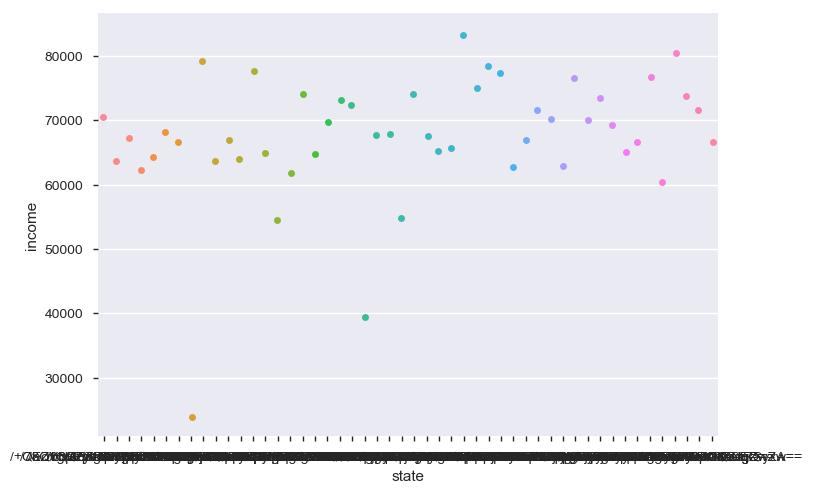

In [61]:
sns.stripplot(x="state", y="income", data=df_state, jitter=True)

In [62]:
state_80 = df_state[df_state.income > 80000]["state"].values
state_60 = df_state[df_state.income < 60000]["state"].values
state_60_80 = df_state[(df_state.income > 60000)&(df_state.income < 80000)]["state"].values

In [63]:
data["is_state_80"] = np.where(data['state'].isin(state_80), 1, 0)
data["is_state_60"] = np.where(data['state'].isin(state_60), 1, 0)
data["is_state_60_80"] = np.where(data['state'].isin(state_60_80), 1, 0)

### 4.1.1 Real State

In [64]:
df_rstate = data.groupby("real_state")["default",'risk_rate','amount_borrowed', 'income', 'n_bankruptcies','n_defaulted_loans', 'n_accounts'].mean()
df_rstate = df_rstate.reset_index()

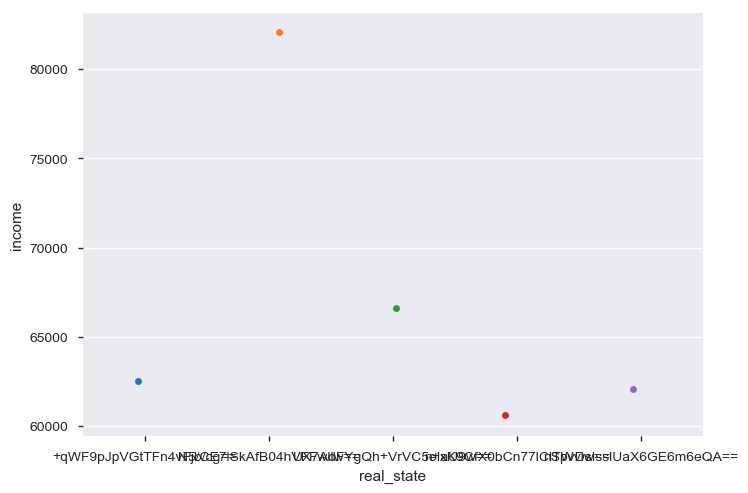

In [65]:
sns.stripplot(x="real_state", y="income", data=df_rstate, jitter=True);

In [66]:
rstate_80 = df_rstate[df_rstate.income > 80000]["real_state"].values
rstate_65 = df_rstate[df_rstate.income < 65000]["real_state"].values
rstate_65_80 = df_rstate[(df_rstate.income > 65000)&(df_state.income < 80000)]["real_state"].values

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
data["is_rstate_80"] = np.where(data['real_state'].isin(rstate_80), 1, 0)
data["is_rstate_65"] = np.where(data['real_state'].isin(rstate_65), 1, 0)
data["is_rstate_65_80"] = np.where(data['real_state'].isin(rstate_65_80), 1, 0)

## 4.2 Decompose a Date-Time

In [68]:
data['delta_last'] = (data.last_payment.max()  - data.last_payment)
data['delta_loan'] = (data.end_last_loan.max()  - data.end_last_loan)

In [69]:
data["month_last_payment"] = data.last_payment.dt.month
data["year_last_payment"] = data.last_payment.dt.year
data["month_end_last_loan"] = data.end_last_loan.dt.month
data["year_end_last_loan"] = data.end_last_loan.dt.year

In [70]:
data["delta_last_loan"] = (data.last_payment - data.end_last_loan)

## 4.3 Reframe Numerical Quantities

In [71]:
data['amount_borrowed_thousands'] = data.amount_borrowed/1000
data['income_thousands'] = data.income/1000

# 5. Prediction

****
<div class="alert alert-block alert-warning">
<font color=black>
**Change kernel to R**

</font>
</div>
****

## 5.1 Split into training & test sets

In [94]:
train = data.iloc[0:63807,:]
test = data.iloc[63807:len(data),:]

In [95]:
train = train.dropna()
train = train.set_index('ids')

In [96]:
train['delta_last'] = train['delta_last'].astype('timedelta64[D]')
train['delta_last_loan'] = train['delta_last_loan'].astype('timedelta64[D]')
train['delta_loan'] = train['delta_loan'].astype('timedelta64[D]')
train['default'] = train['default'].astype('int64')
train['facebook_profile'] = train['facebook_profile'].astype('int64')

In [97]:
train = train.drop(['last_payment', 'end_last_loan'], axis=1)

In [98]:
pandas_profiling.ProfileReport(train)

In [99]:
train.to_csv("train_cp2.csv")

## 5.2 Prediction Model

### 5.2.1 Load data

In [1]:
# Import the necessaries libraries for the code
library(data.table)
library(dplyr)
library(tidyr)

# Load Data
path <- "C:/Users/Usuario"

train <- fread(file.path(path, "train_cp2.csv"))

# Train / Test datasets 
train$ids <- NULL
train$score_1 <- as.factor(train$score_1)
train$score_2 <- as.factor(train$score_2)
train$sign <- as.factor(train$sign)
train$gender <- as.factor(train$gender)
train$state <- as.factor(train$state)
train$real_state <- as.factor(train$real_state)

#splitting data using Caret package
library(caret)
trainIndex <- createDataPartition(train$default, p=0.7, list=FALSE, times=1)
xgb_train <- train[trainIndex,]
xgb_test <- train[-trainIndex,]


Warning message:
"package 'data.table' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

### 5.2.2 Parameters Tuning

#### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [2]:
# Model using default parameters
library(xgboost)

labels <- xgb_train$default
ts_label <- xgb_test$default

#drop a column
mtx_train <- model.matrix(~.+0,data = xgb_train[,-1]) 
mtx_test <- model.matrix(~.+0,data = xgb_test[,-1])


#preparing matrix 
dtrain <- xgb.DMatrix(data = mtx_train,label = labels) 
dtest <- xgb.DMatrix(data = mtx_test,label=ts_label)

#Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
params <- list(
  booster = "gbtree", 
  objective = "binary:logistic",
  eta=0.1, 
  gamma=0, 
  max_depth=6, 
  min_child_weight=1, 
  subsample=1, 
  colsample_bytree=1
)

xgbcv <- xgb.cv( params = params, data = dtrain, nrounds = 100, nfold = 5, showsd = T, stratified = T, print_every_n = 10, early_stop_rounds = 20, maximize = F)

Warning message:
"package 'xgboost' was built under R version 3.4.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



[1]	train-error:0.082942+0.000678	test-error:0.085470+0.001470 
[11]	train-error:0.082488+0.000403	test-error:0.085017+0.001343 
[21]	train-error:0.081463+0.000514	test-error:0.084444+0.001104 
[31]	train-error:0.078529+0.000560	test-error:0.082536+0.001628 
[41]	train-error:0.074778+0.000340	test-error:0.081057+0.001444 
[51]	train-error:0.071605+0.000630	test-error:0.080079+0.001493 
[61]	train-error:0.068558+0.000722	test-error:0.079483+0.001795 
[71]	train-error:0.065898+0.000611	test-error:0.079101+0.001565 
[81]	train-error:0.063805+0.000537	test-error:0.078696+0.001911 
[91]	train-error:0.062015+0.000383	test-error:0.078529+0.001827 
[100]	train-error:0.060900+0.000415	test-error:0.078648+0.001614 


After 100 iterations conversion between 61 and 91 interation, run over printing ever iteration

In [3]:
xgbcv <- xgb.cv( params = params, data = dtrain, nrounds = 100, nfold = 5, showsd = T, stratified = T, print_every_n = 1, early_stop_rounds = 20, maximize = F)

[1]	train-error:0.083025+0.000725	test-error:0.085780+0.003682 
[2]	train-error:0.083013+0.001277	test-error:0.085780+0.002714 
[3]	train-error:0.082673+0.000834	test-error:0.085017+0.003740 
[4]	train-error:0.082256+0.001287	test-error:0.084802+0.002989 
[5]	train-error:0.082357+0.001425	test-error:0.084778+0.002969 
[6]	train-error:0.082566+0.001350	test-error:0.085041+0.002843 
[7]	train-error:0.082530+0.001371	test-error:0.085232+0.002973 
[8]	train-error:0.082536+0.001300	test-error:0.085375+0.002727 
[9]	train-error:0.082727+0.001402	test-error:0.085327+0.002872 
[10]	train-error:0.082924+0.001127	test-error:0.085303+0.002916 
[11]	train-error:0.082954+0.001091	test-error:0.085589+0.003062 
[12]	train-error:0.082846+0.000931	test-error:0.085661+0.003107 
[13]	train-error:0.082572+0.000798	test-error:0.085566+0.003116 
[14]	train-error:0.082590+0.000926	test-error:0.085470+0.003139 
[15]	train-error:0.082381+0.000983	test-error:0.085351+0.003118 
[16]	train-error:0.082262+0.001094

****
<div class="alert alert-block alert-success">
<font color=black>
Conversion at **80 as an optimal estimator**.
</div>
****

In [9]:
# Model training
xgb1 <- xgb.train (params = params, data = dtrain, nrounds = 80, watchlist = list(val=dtest,train=dtrain), print_every_n = 10, early_stop_round = 10, maximize = F , eval_metric = "error")
#model prediction
xgbpred <- predict (xgb1,dtest)
xgbpred <- ifelse (xgbpred > 0.5,1,0)


# Confusion matrix
confusionMatrix(xgbpred, ts_label)


[1]	val-error:0.087225	train-error:0.083228 
[11]	val-error:0.086335	train-error:0.083395 
[21]	val-error:0.086168	train-error:0.081940 
[31]	val-error:0.083663	train-error:0.079053 
[41]	val-error:0.082661	train-error:0.075785 
[51]	val-error:0.081213	train-error:0.073066 
[61]	val-error:0.080156	train-error:0.070251 
[71]	val-error:0.080212	train-error:0.067890 
[80]	val-error:0.080156	train-error:0.066220 


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 14624   956
         1   484  1901
                                          
               Accuracy : 0.9198          
                 95% CI : (0.9158, 0.9238)
    No Information Rate : 0.841           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6788          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9680          
            Specificity : 0.6654          
         Pos Pred Value : 0.9386          
         Neg Pred Value : 0.7971          
             Prevalence : 0.8410          
         Detection Rate : 0.8140          
   Detection Prevalence : 0.8672          
      Balanced Accuracy : 0.8167          
                                          
       'Positive' Class : 0               
                                          

In [8]:
#view variable importance plot
mat <- xgb.importance (feature_names = colnames(mtx_train),model = xgb1)
xgb.plot.importance (importance_matrix = mat[1:20])


ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): não é possível iniciar dispositivo png()


plot without title

****
<div class="alert alert-block alert-success">
<font color=black>
Accuracy - 91.98%
</div>
****

#### Step 2: Tune max_depth and min_child_weight_run 

In [10]:

searchGridSubCol <- expand.grid(subsample = c(0.1), 
                                colsample_bytree = c(1),
                                max_depth = c(5,6,7,8),
                                min_child = seq(1,3), 
                                eta = c(0.1)
)

ntrees <- 5

system.time(
  rmseErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
    
    #Extract Parameters to test
    currentSubsampleRate <- parameterList[["subsample"]]
    currentColsampleRate <- parameterList[["colsample_bytree"]]
    currentDepth <- parameterList[["max_depth"]]
    currentEta <- parameterList[["eta"]]
    currentMinChild <- parameterList[["min_child"]]
    xgboostModelCV <- xgb.cv(data =  dtrain, nrounds = ntrees, nfold = 2, showsd = TRUE, 
                             metrics = "rmse", verbose = TRUE, "eval_metric" = "rmse",
                             "objective" = "binary:logistic", "max.depth" = currentDepth, "eta" = currentEta,                               
                             "subsample" = currentSubsampleRate, "colsample_bytree" = currentColsampleRate
                             , print_every_n = 10, "min_child_weight" = currentMinChild, booster = "gbtree",
                             early_stopping_rounds = 10)
    
    xvalidationScores <- as.data.frame(xgboostModelCV$evaluation_log)
    rmse <- tail(xvalidationScores$test_rmse_mean, 1)
    trmse <- tail(xvalidationScores$train_rmse_mean,1)
    output <- return(c(rmse, trmse, currentSubsampleRate, currentColsampleRate, currentDepth, currentEta, currentMinChild))
    
  }))

output <- as.data.frame(t(rmseErrorsHyperparameters))
head(output)
varnames <- c("TestRMSE", "TrainRMSE", "SubSampRate", "ColSampRate", "Depth", "eta", "currentMinChild")
names(output) <- varnames


[1]	train-rmse:0.465075+0.000051	test-rmse:0.465352+0.000331 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.365494+0.001175	test-rmse:0.366557+0.000173 
[1]	train-rmse:0.464491+0.000129	test-rmse:0.464670+0.000212 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.364542+0.000204	test-rmse:0.365719+0.000104 
[1]	train-rmse:0.465099+0.000281	test-rmse:0.465565+0.000871 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.364927+0.001919	test-rmse:0.366629+0.000240 
[1]	train-rmse:0.464674+0.000219	test-rmse:0.465010+0.000327 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.363820+0.000221	test-

   user  system elapsed 
  17.69    3.24    6.36 

V1        V2        V3  V4 V5 V6  V7
1 0.3665565 0.3654945 0.1 1  5  0.1 1 
2 0.3657190 0.3645425 0.1 1  6  0.1 1 
3 0.3666290 0.3649270 0.1 1  7  0.1 1 
4 0.3658555 0.3638205 0.1 1  8  0.1 1 
5 0.3677850 0.3671365 0.1 1  5  0.1 2 
6 0.3655380 0.3647760 0.1 1  6  0.1 2

****
<div class="alert alert-block alert-success">
<font color=black>
As a result the optimum max_depth = 7 and min_child_weight = 1
</div>
****

#### Step 3: Tune gamma

In [11]:

searchGridSubCol <- expand.grid(subsample = c(0.1), 
                                colsample_bytree = c(1),
                                max_depth = 7,
                                min_child = 1,
                                gamma = c(0,0.1,0.2,0.3,0.4),
                                eta = c(0.1)
)

ntrees <- 5

system.time(
  rmseErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
    
    #Extract Parameters to test
    currentSubsampleRate <- parameterList[["subsample"]]
    currentColsampleRate <- parameterList[["colsample_bytree"]]
    currentDepth <- parameterList[["max_depth"]]
    currentEta <- parameterList[["eta"]]
    currentMinChild <- parameterList[["min_child"]]
    currentgamma <- parameterList[["gamma"]]
    xgboostModelCV <- xgb.cv(data =  dtrain, nrounds = ntrees, nfold = 2, showsd = TRUE, 
                             metrics = "rmse", verbose = TRUE, "eval_metric" = "rmse",
                             "objective" = "binary:logistic", "max.depth" = currentDepth,"gamma" = currentgamma, "eta" = currentEta,                               
                             "subsample" = currentSubsampleRate, "colsample_bytree" = currentColsampleRate
                             , print_every_n = 10, "min_child_weight" = currentMinChild, booster = "gbtree",
                             early_stopping_rounds = 10)
    
    xvalidationScores <- as.data.frame(xgboostModelCV$evaluation_log)
    rmse <- tail(xvalidationScores$test_rmse_mean, 1)
    trmse <- tail(xvalidationScores$train_rmse_mean,1)
    output <- return(c(rmse, trmse, currentSubsampleRate, currentColsampleRate, currentDepth, currentEta, currentMinChild, currentgamma))
    
  }))

output <- as.data.frame(t(rmseErrorsHyperparameters))
head(output)
varnames <- c("TestRMSE", "TrainRMSE", "SubSampRate", "ColSampRate", "Depth", "eta", "currentMinChild", "gamma")
names(output) <- varnames



[1]	train-rmse:0.464435+0.000072	test-rmse:0.464793+0.000208 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.364810+0.000660	test-rmse:0.366320+0.000190 
[1]	train-rmse:0.464541+0.000826	test-rmse:0.464996+0.000716 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.364393+0.000911	test-rmse:0.366274+0.000080 
[1]	train-rmse:0.464149+0.000241	test-rmse:0.464495+0.000195 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.364459+0.000177	test-rmse:0.366031+0.000161 
[1]	train-rmse:0.464492+0.000301	test-rmse:0.464693+0.000413 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.363305+0.000327	test-

   user  system elapsed 
   7.06    1.11    2.72 

V1        V2        V3  V4 V5 V6  V7 V8 
1 0.3663195 0.3648105 0.1 1  7  0.1 1  0.0
2 0.3662740 0.3643925 0.1 1  7  0.1 1  0.1
3 0.3660305 0.3644595 0.1 1  7  0.1 1  0.2
4 0.3648110 0.3633050 0.1 1  7  0.1 1  0.3
5 0.3653630 0.3636575 0.1 1  7  0.1 1  0.4

****
<div class="alert alert-block alert-success">
<font color=black>
Best gamma at 0.1
</div>
****

#### Step 4: Tune subsample and colsample_bytree

In [12]:

searchGridSubCol <- expand.grid(subsample = c(0.1,0.6,0.7,0.8,0.9), 
                                colsample_bytree = c(0.6,0.7,0.8,0.9,1),
                                max_depth = 7,
                                min_child = 1,
                                gamma = 0.1,
                                eta = c(0.1)
)

ntrees <- 5

system.time(
  rmseErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
    
    #Extract Parameters to test
    currentSubsampleRate <- parameterList[["subsample"]]
    currentColsampleRate <- parameterList[["colsample_bytree"]]
    currentDepth <- parameterList[["max_depth"]]
    currentEta <- parameterList[["eta"]]
    currentMinChild <- parameterList[["min_child"]]
    currentgamma <- parameterList[["gamma"]]
    xgboostModelCV <- xgb.cv(data =  dtrain, nrounds = ntrees, nfold = 2, showsd = TRUE, 
                             metrics = "rmse", verbose = TRUE, "eval_metric" = "rmse",
                             "objective" = "binary:logistic", "max.depth" = currentDepth,"gamma" = currentgamma, "eta" = currentEta,                               
                             "subsample" = currentSubsampleRate, "colsample_bytree" = currentColsampleRate
                             , print_every_n = 10, "min_child_weight" = currentMinChild, booster = "gbtree",
                             early_stopping_rounds = 10)
    
    xvalidationScores <- as.data.frame(xgboostModelCV$evaluation_log)
    rmse <- tail(xvalidationScores$test_rmse_mean, 1)
    trmse <- tail(xvalidationScores$train_rmse_mean,1)
    output <- return(c(rmse, trmse, currentSubsampleRate, currentColsampleRate, currentDepth, currentEta, currentMinChild, currentgamma))
    
  }))

output <- as.data.frame(t(rmseErrorsHyperparameters))
head(output)
varnames <- c("TestRMSE", "TrainRMSE", "SubSampRate", "ColSampRate", "Depth", "eta", "currentMinChild", "gamma")
names(output) <- varnames



[1]	train-rmse:0.467992+0.002375	test-rmse:0.468350+0.002455 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.368727+0.000623	test-rmse:0.370153+0.000257 
[1]	train-rmse:0.465971+0.002878	test-rmse:0.466523+0.002793 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.365322+0.002739	test-rmse:0.368271+0.001632 
[1]	train-rmse:0.464818+0.001689	test-rmse:0.465212+0.001633 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.362457+0.003068	test-rmse:0.364551+0.002908 
[1]	train-rmse:0.468404+0.003812	test-rmse:0.469396+0.004050 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.366812+0.006402	test-

   user  system elapsed 
  49.14    6.64   15.15 

V1        V2        V3  V4  V5 V6  V7 V8 
1 0.3701530 0.3687270 0.1 0.6 7  0.1 1  0.1
2 0.3682710 0.3653215 0.6 0.6 7  0.1 1  0.1
3 0.3645510 0.3624565 0.7 0.6 7  0.1 1  0.1
4 0.3701755 0.3668120 0.8 0.6 7  0.1 1  0.1
5 0.3646270 0.3618090 0.9 0.6 7  0.1 1  0.1
6 0.3682415 0.3668755 0.1 0.7 7  0.1 1  0.1

****
<div class="alert alert-block alert-success">
<font color=black>
best result 0.8 and 1 for subsample e col sample
</div>
****

#### Step 5: Tuning Regularization Parameters

In [13]:

searchGridSubCol <- expand.grid(subsample = 0.8,
                                colsample_bytree = 1,
                                max_depth = 7,
                                min_child = 1,
                                gamma = 0.1,
                                eta = 0.1,
                                reg_alpha = c(1e-5, 1e-2, 0.1, 1, 100)
)

ntrees <- 5

system.time(
  rmseErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
    
    #Extract Parameters to test
    currentSubsampleRate <- parameterList[["subsample"]]
    currentColsampleRate <- parameterList[["colsample_bytree"]]
    currentDepth <- parameterList[["max_depth"]]
    currentEta <- parameterList[["eta"]]
    currentMinChild <- parameterList[["min_child"]]
    currentgamma <- parameterList[["gamma"]]
    currentregalpha <- parameterList[["reg_alpha"]]
    xgboostModelCV <- xgb.cv(data =  dtrain, nrounds = ntrees, nfold = 2, showsd = TRUE, 
                             metrics = "rmse", verbose = TRUE, "eval_metric" = "rmse",
                             "objective" = "binary:logistic", "max.depth" = currentDepth,"gamma" = currentgamma, "eta" = currentEta,                               
                             "subsample" = currentSubsampleRate, "colsample_bytree" = currentColsampleRate
                             , print_every_n = 10, reg_alpha = currentregalpha, "min_child_weight" = currentMinChild, booster = "gbtree",
                             early_stopping_rounds = 10)
    
    xvalidationScores <- as.data.frame(xgboostModelCV$evaluation_log)
    rmse <- tail(xvalidationScores$test_rmse_mean, 1)
    trmse <- tail(xvalidationScores$train_rmse_mean,1)
    output <- return(c(rmse, trmse, currentSubsampleRate, currentColsampleRate, currentDepth, currentEta, currentMinChild, currentgamma, currentregalpha))
    
  }))

output <- as.data.frame(t(rmseErrorsHyperparameters))
head(output)
varnames <- c("TestRMSE", "TrainRMSE", "SubSampRate", "ColSampRate", "Depth", "eta", "currentMinChild", "gamma", "reg_alpha")
names(output) <- varnames


[1]	train-rmse:0.463178+0.000107	test-rmse:0.463603+0.000057 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.358424+0.000265	test-rmse:0.361071+0.000450 
[1]	train-rmse:0.463064+0.000154	test-rmse:0.463646+0.000115 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.358283+0.000945	test-rmse:0.361107+0.000258 
[1]	train-rmse:0.463075+0.000081	test-rmse:0.463646+0.000019 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.358252+0.000314	test-rmse:0.361140+0.000270 
[1]	train-rmse:0.463232+0.000017	test-rmse:0.463693+0.000004 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[5]	train-rmse:0.358738+0.000021	test-

   user  system elapsed 
  11.75    1.30    3.26 

V1        V2        V3  V4 V5 V6  V7 V8  V9   
1 0.3610710 0.3584235 0.8 1  7  0.1 1  0.1 1e-05
2 0.3611070 0.3582825 0.8 1  7  0.1 1  0.1 1e-02
3 0.3611405 0.3582525 0.8 1  7  0.1 1  0.1 1e-01
4 0.3613105 0.3587385 0.8 1  7  0.1 1  0.1 1e+00
5 0.3788515 0.3781350 0.8 1  7  0.1 1  0.1 1e+02

****
<div class="alert alert-block alert-success">
<font color=black>
Best reg_alpha = 1e-5
</div>
****

### 5.2.3 Tuned Model

In [14]:
#Final evaluation
params <- list(
  booster = "gbtree", 
  objective = "binary:logistic",
  eta=0.1, 
  gamma=0.1, 
  max_depth=7, 
  min_child_weight=1, 
  subsample=0.8, 
  colsample_bytree=1,
  reg_alpha=1e-5
)


#model training
xgb1 <- xgb.train (params = params, data = dtrain, nrounds = 80, watchlist = list(val=dtest,train=dtrain), print_every_n = 10, early_stop_round = 10, maximize = F , eval_metric = "error")
#model prediction
xgbpred <- predict (xgb1,dtest)
xgbpred <- ifelse (xgbpred > 0.5,1,0)


#confusion matrix
confusionMatrix(xgbpred, ts_label)
#Accuracy - %` 

#view variable importance plot
mat <- xgb.importance (feature_names = colnames(mtx_train),model = xgb1)
xgb.plot.importance (importance_matrix = mat[1:20])


[1]	val-error:0.087893	train-error:0.081176 
[11]	val-error:0.083830	train-error:0.078553 
[21]	val-error:0.083607	train-error:0.077885 
[31]	val-error:0.081102	train-error:0.073662 
[41]	val-error:0.080379	train-error:0.070752 
[51]	val-error:0.079878	train-error:0.068080 
[61]	val-error:0.079265	train-error:0.065122 
[71]	val-error:0.079488	train-error:0.062141 
[80]	val-error:0.079822	train-error:0.059708 


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 14622   948
         1   486  1909
                                          
               Accuracy : 0.9202          
                 95% CI : (0.9161, 0.9241)
    No Information Rate : 0.841           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6806          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9678          
            Specificity : 0.6682          
         Pos Pred Value : 0.9391          
         Neg Pred Value : 0.7971          
             Prevalence : 0.8410          
         Detection Rate : 0.8139          
   Detection Prevalence : 0.8667          
      Balanced Accuracy : 0.8180          
                                          
       'Positive' Class : 0               
                                          

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): não é possível iniciar dispositivo png()


plot without title

****
<div class="alert alert-block alert-success">
<font color=black>
Accuracy - 92.02%
</div>
****